In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %pdb

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# modify font size
sns.set(font_scale=1.5)

In [228]:
df1 = pd.read_csv("./log_0.1_0_0.dat")
df2 = pd.read_csv("./log_1_0_0.dat")

df3 = pd.read_csv("./log_0.1_0_0.5.dat")
df4 = pd.read_csv("./log_0.1_0_1.dat")
df5 = pd.read_csv("./log_0.1_0_2.dat")
df6 = pd.read_csv("./log_0.1_0_4.dat")
df7 = pd.read_csv("./log_0.1_0_8.dat")

df8 = pd.read_csv("./log_0.1_0.05_8.dat")
df9 = pd.read_csv("./log_0.1_0.1_8.dat")
df10 = pd.read_csv("./log_0.1_0.2_8.dat")
df11 = pd.read_csv("./log_0.1_0.4_8.dat")

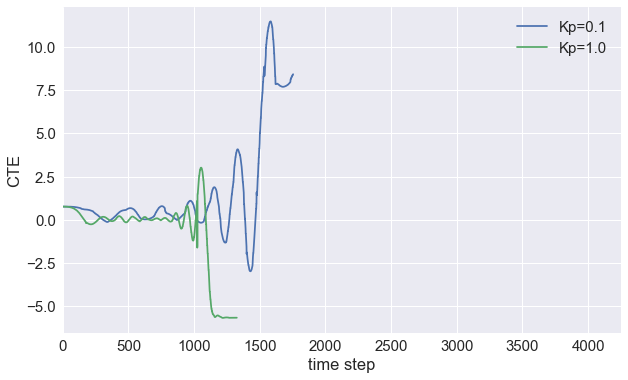

In [225]:
plt.figure(figsize=(10, 6))
xmax = 4250
ax = plt.subplot(1,1,1)
ax.set_xlim(0, xmax)
ax.plot(df1.index, df1.cte, label="Kp=0.1")
ax.plot(df2.index, df2.cte, label="Kp=1.0")
ax.set_xlabel("time step")
ax.set_ylabel("CTE")
plt.legend()
plt.savefig("./fig1.png", bbox_inches='tight')

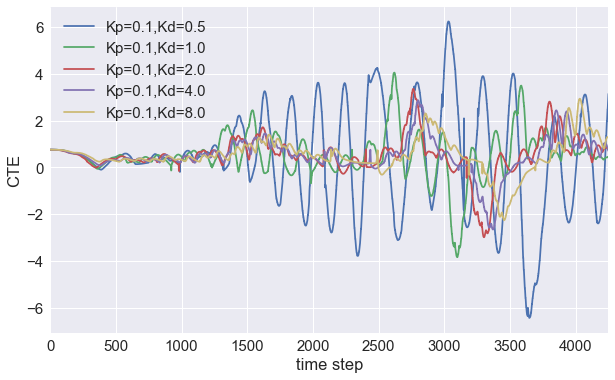

In [226]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(1,1,1)
ax.set_xlim(0, xmax)
ax.plot(df3.index, df3.cte, label='Kp=0.1,Kd=0.5')
ax.plot(df4.index, df4.cte, label='Kp=0.1,Kd=1.0')
ax.plot(df5.index, df5.cte, label='Kp=0.1,Kd=2.0')
ax.plot(df6.index, df6.cte, label='Kp=0.1,Kd=4.0')
ax.plot(df7.index, df7.cte, label='Kp=0.1,Kd=8.0')
ax.set_xlabel("time step")
ax.set_ylabel("CTE")
plt.legend()
plt.savefig("./fig2.png", bbox_inches='tight')

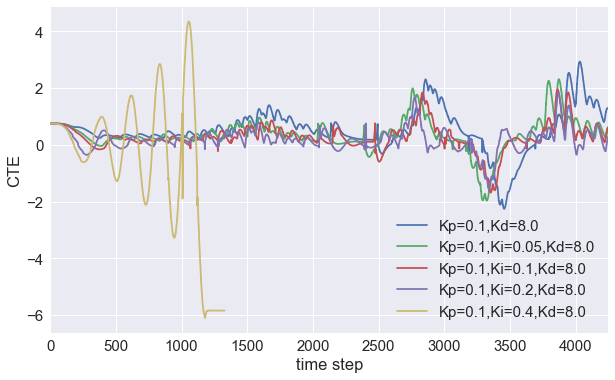

In [229]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(1,1,1)
ax.plot(df7.index, df7.cte, label='Kp=0.1,Kd=8.0')
ax.plot(df8.index, df8.cte, label='Kp=0.1,Ki=0.05,Kd=8.0')
ax.plot(df9.index, df9.cte, label='Kp=0.1,Ki=0.1,Kd=8.0')
ax.plot(df10.index, df10.cte, label='Kp=0.1,Ki=0.2,Kd=8.0')
ax.plot(df11.index, df11.cte, label='Kp=0.1,Ki=0.4,Kd=8.0')
ax.set_xlabel("time step")
ax.set_ylabel("CTE")
ax.set_xlim(0, xmax)
plt.legend()
plt.savefig("./fig3.png", bbox_inches='tight')

In [143]:
def total_cte(df, step_start, step_end):
    df["next_cte"] = df["cte"].shift(-1)
    return (0.5*(df["next_cte"] + df["cte"]).abs()*df["speed"])[step_start:step_end].sum()


In [153]:
df_res = pd.DataFrame([
    {'param':'Kp=0.1,Kd=0.5', 'total_cte':total_cte(df3, 1, xmax)},
    {'param':'Kp=0.1,Kd=1.0', 'total_cte':total_cte(df4, 1, xmax)},
    {'param':'Kp=0.1,Kd=2.0', 'total_cte':total_cte(df5, 1, xmax)},
    {'param':'Kp=0.1,Kd=4.0', 'total_cte':total_cte(df6, 1, xmax)},
    {'param':'Kp=0.1,Kd=8.0', 'total_cte':total_cte(df7, 1, xmax)},
    {'param':'Kp=0.1,Ki=0.05,Kd=8.0', 'total_cte':total_cte(df8, 1, xmax)},
    {'param':'Kp=0.1,Ki=0.1,Kd=8.0', 'total_cte':total_cte(df9, 1, xmax)},
    {'param':'Kp=0.1,Ki=0.2,Kd=8.0', 'total_cte':total_cte(df10, 1, xmax)},
    {'param':'Kp=0.1,Ki=0.4,Kd=8.0', 'total_cte':total_cte(df11, 1, xmax)},
])

In [181]:
df_res

,param,total_cte
0,"Kp=0.1,Kd=0.5",191419.447342
1,"Kp=0.1,Kd=1.0",109773.325676
2,"Kp=0.1,Kd=2.0",97544.289164
3,"Kp=0.1,Kd=4.0",92526.012420
4,"Kp=0.1,Kd=8.0",91138.336420
5,"Kp=0.1,Ki=0.05,Kd=8.0",65343.788992
6,"Kp=0.1,Ki=0.1,Kd=8.0",49773.882532
7,"Kp=0.1,Ki=0.2,Kd=8.0",39803.233736
8,"Kp=0.1,Ki=0.4,Kd=8.0",35893.924159


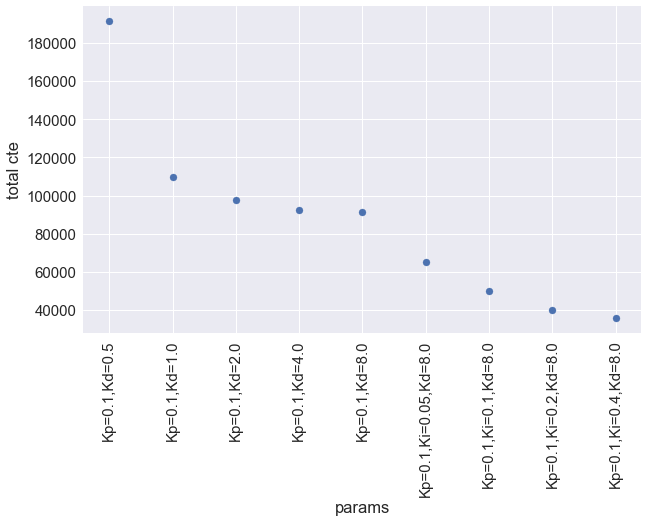

In [231]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(9), df_res.total_cte.values)
plt.xticks(range(9), df_res.param, rotation='vertical');
plt.xlabel("params")
plt.ylabel("total cte");
plt.savefig("./fig4.png", bbox_inches='tight')

In [88]:
def plot_ctes(df, kp=1.0, ki=1.0, kd=1.0):
    plt.figure(figsize=(12, 8))
    ax = plt.subplot(1,1,1)
    ax.plot(df.index, kp*df.cte, label='cte')
    ax.plot(df.index, kd*df.cte_diff, label='cte_diff')
    ax.plot(df.index, ki*df.cte_integ, label='cte_integ')
    plt.legend()

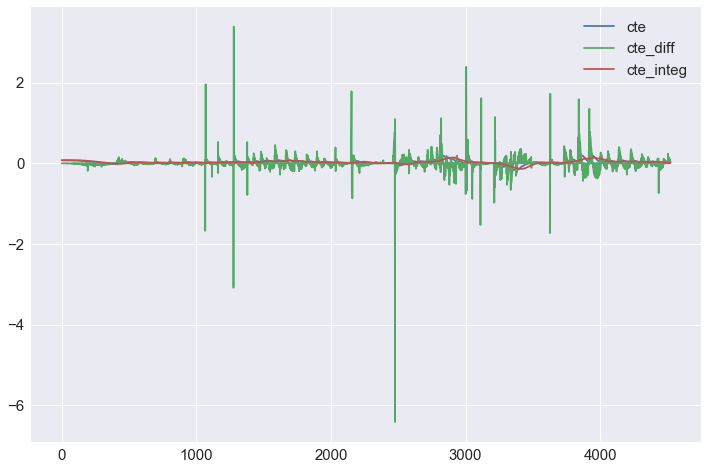

In [208]:
plot_ctes(df9, 0.1, 0.1, 8)